In [116]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  collections

In [62]:
names = ['ab_id','batter_id', 'event', 'g_id', 'inning', 'p_score', 'p_throws', 'pitcher_id', 'stand', 'top']
dtype={'ab_id': int}
atbats = pd.read_csv("/Users/alexhumble/Downloads/mlb-pitch-data-20152018/atbats.csv",
             low_memory=False,  header = None, names=names)

print(atbats.head())

          ab_id  batter_id      event         g_id  inning  p_score  p_throws  \
0         ab_id  batter_id      event         g_id  inning  p_score  p_throws   
1  2015000001.0     572761  Groundout  201500001.0       1        0         L   
2  2015000002.0     518792     Double  201500001.0       1        0         L   
3  2015000003.0     407812     Single  201500001.0       1        0         L   
4  2015000004.0     425509  Strikeout  201500001.0       1        0         L   

   pitcher_id  stand   top  
0  pitcher_id  stand   top  
1      452657      L  True  
2      452657      L  True  
3      452657      R  True  
4      452657      R  True  


In [158]:
atbats.isnull()
print(atbats.isnull().values.sum())

0


This was performed in order to see if there was any data missing

In [71]:
atbats.dtypes

ab_id         object
batter_id     object
event         object
g_id          object
inning        object
p_score       object
p_throws      object
pitcher_id    object
stand         object
top           object
dtype: object

In [64]:
atbats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740965 entries, 0 to 740964
Data columns (total 10 columns):
ab_id         740965 non-null object
batter_id     740965 non-null object
event         740965 non-null object
g_id          740965 non-null object
inning        740965 non-null object
p_score       740965 non-null object
p_throws      740965 non-null object
pitcher_id    740965 non-null object
stand         740965 non-null object
top           740965 non-null object
dtypes: object(10)
memory usage: 56.5+ MB


In [65]:
atbats['stand'].value_counts("R")

R        0.584953
L        0.415045
stand    0.000001
Name: stand, dtype: float64

This was done to see the % of hitters that bat left handed vs right handed. This is consistent with general basic lineups, where the average lineup has 3-4 left handed hitters and 5-6 right handed hitters

In [66]:
atbats['p_throws'].value_counts("R")

R           0.732129
L           0.267870
p_throws    0.000001
Name: p_throws, dtype: float64

The same analysis from above was performed to see the breakdown of pitchers and how many are left vs right handed. This data may be skewed however because right handed pitchers might pitch more as starters and therefore be included in more "event" sequences then left handed pitchers who may pitch in the bullpen more often.

In [67]:
right_hand = atbats['stand'] == "R"
atbatsR = atbats[right_hand]
print(atbats1)

               ab_id batter_id             event         g_id inning p_score  \
3       2015000003.0    407812            Single  201500001.0      1       0   
4       2015000004.0    425509         Strikeout  201500001.0      1       0   
7       2015000007.0    624585         Groundout  201500001.0      1       1   
9       2015000009.0    516770         Groundout  201500001.0      1       1   
10      2015000010.0    425877         Strikeout  201500001.0      2       0   
13      2015000013.0    425794         Strikeout  201500001.0      2       0   
17      2015000017.0    592609         Strikeout  201500001.0      2       2   
18      2015000018.0    424325            Flyout  201500001.0      2       2   
21      2015000021.0    407812         Groundout  201500001.0      3       0   
22      2015000022.0    425509         Strikeout  201500001.0      3       0   
26      2015000026.0    624585         Strikeout  201500001.0      3       2   
28      2015000028.0    425877          

In [69]:
left_hand = atbats['stand'] == "L"
atbatsL = atbats[left_hand]
print(atbats1)

               ab_id batter_id             event         g_id inning p_score  \
3       2015000003.0    407812            Single  201500001.0      1       0   
4       2015000004.0    425509         Strikeout  201500001.0      1       0   
7       2015000007.0    624585         Groundout  201500001.0      1       1   
9       2015000009.0    516770         Groundout  201500001.0      1       1   
10      2015000010.0    425877         Strikeout  201500001.0      2       0   
13      2015000013.0    425794         Strikeout  201500001.0      2       0   
17      2015000017.0    592609         Strikeout  201500001.0      2       2   
18      2015000018.0    424325            Flyout  201500001.0      2       2   
21      2015000021.0    407812         Groundout  201500001.0      3       0   
22      2015000022.0    425509         Strikeout  201500001.0      3       0   
26      2015000026.0    624585         Strikeout  201500001.0      3       2   
28      2015000028.0    425877          

In [73]:
ninth_inning = atbats['inning'] == "9"
atbats9 = atbats[ninth_inning]
print(atbats9)

               ab_id batter_id             event         g_id inning p_score  \
69      2015000069.0    572761            Flyout  201500001.0      9       0   
70      2015000070.0    518792           Lineout  201500001.0      9       0   
71      2015000071.0    407812              Walk  201500001.0      9       0   
72      2015000072.0    425509            Flyout  201500001.0      9       0   
73      2015000073.0    458085         Strikeout  201500001.0      9       3   
74      2015000074.0    592609         Strikeout  201500001.0      9       3   
75      2015000075.0    570489         Strikeout  201500001.0      9       3   
138     2015000138.0    405395              Walk  201500002.0      9       4   
139     2015000139.0    459964          Forceout  201500002.0      9       4   
140     2015000140.0    501896  Grounded Into DP  201500002.0      9       4   
202     2015000202.0    542194         Strikeout  201500003.0      9       1   
203     2015000203.0    457727         S

In [78]:
first_inning = atbats['inning'] == "1"
atbats1 = atbats[first_inning]
print(atbats1)

               ab_id batter_id             event         g_id inning p_score  \
1       2015000001.0    572761         Groundout  201500001.0      1       0   
2       2015000002.0    518792            Double  201500001.0      1       0   
3       2015000003.0    407812            Single  201500001.0      1       0   
4       2015000004.0    425509         Strikeout  201500001.0      1       0   
5       2015000005.0    571431         Strikeout  201500001.0      1       0   
6       2015000006.0    451594            Double  201500001.0      1       1   
7       2015000007.0    624585         Groundout  201500001.0      1       1   
8       2015000008.0    519203         Strikeout  201500001.0      1       1   
9       2015000009.0    516770         Groundout  201500001.0      1       1   
76      2015000076.0    594777         Strikeout  201500002.0      1       0   
77      2015000077.0    545361          Home Run  201500002.0      1       0   
78      2015000078.0    405395         S

In [119]:
no_out = set(["Single", "Double", "Triple", "Home Run", "Hit By Pitch", "Walk", "Intent Walk", 
              "Field Error", "Catcher Interference", "Fan Interference"])
result = "Single"
result in no_out

True

In [121]:
not_out1 = [result in no_out for result in atbats1.event]

In [122]:
not_out9 = [result in no_out for result in atbats9.event]

In [123]:
np.mean(not_out1)

0.3380907675670537

I cleaned up the data and sorted it to see the probability of making an out in certain scenarios and how they differ. The sample size is large enough to where these differences are statistically significant. Here shows that the OBP is .338 in the first inning, .311 in the ninth inning, .322 for RH hitters and .332 for LH Hitters

In [124]:
np.mean(not_out9)

0.31134644962830044

In [126]:
not_outR = [result in no_out for result in atbatsR.event]
not_outL = [result in no_out for result in atbatsL.event]

In [127]:
np.mean(not_outR)

0.32222965646125096

In [128]:
np.mean(not_outL)

0.33213238211059593

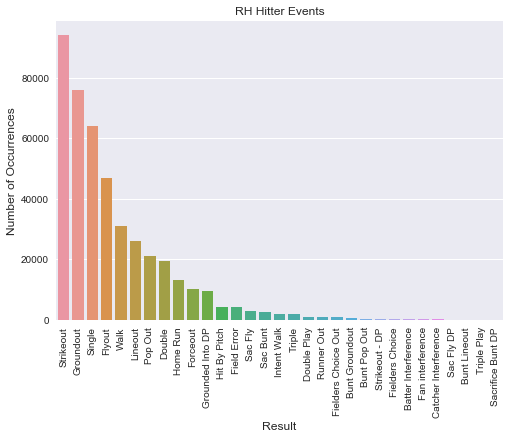

In [68]:
RH_inning_plays =atbatsR['event'].value_counts()
sns.set(style="darkgrid")
sns.barplot(RH_inning_plays.index, RH_inning_plays.values, alpha=1.0)
plt.title('RH Hitter Events')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show()

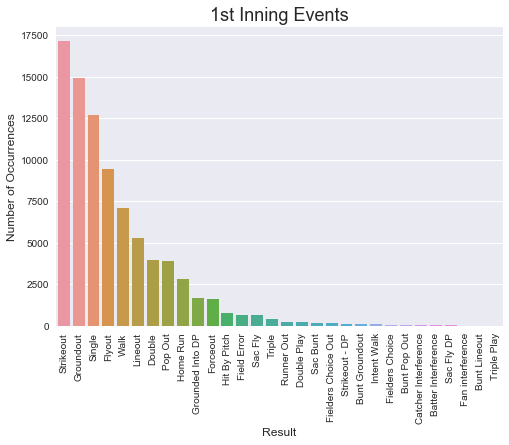

In [79]:
first_inning_plays =atbats1['event'].value_counts()
sns.set(style="darkgrid")
sns.barplot(first_inning_plays.index, first_inning_plays.values, alpha=1.0)
plt.title('1st Inning Events', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show()

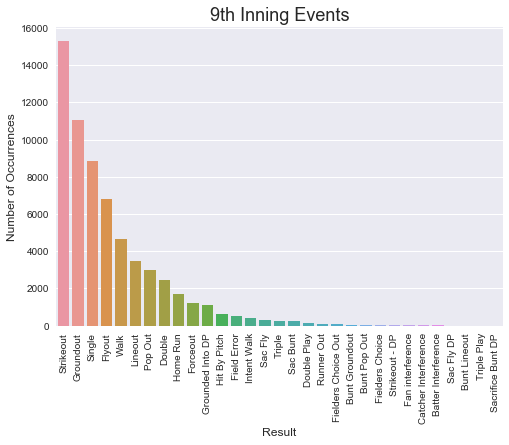

In [76]:
ninth_inning_plays =atbats9['event'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ninth_inning_plays.index, ninth_inning_plays.values, alpha=1.0)
plt.title('9th Inning Events', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show()

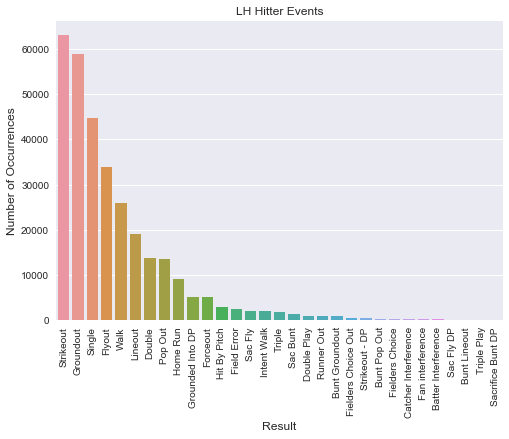

In [70]:
LH_inning_plays =atbatsL['event'].value_counts()
sns.set(style="darkgrid")
sns.barplot(LH_inning_plays.index, LH_inning_plays.values, alpha=1.0)
plt.title('LH Hitter Events')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.xticks(rotation=90)
plt.show()

I plotted the data to show the breakdown of events in both the first and ninth innings, and for LH and RH hitters. It is apparent through the visualization that strikeouts are more common in the ninth inning than in the first inning. This is due to closers being used in high leverage situations and their heightened ability to generate strikeouts

In [137]:
print (
np.sum(not_out1),
np.sum(not_out9),
np.sum(not_outR),
np.sum(not_outL))

28450 19433 139664 102142


In [146]:
print(
len(not_out1) - np.sum(not_out1),
len(not_out9) - np.sum(not_out9),
len(not_outL) - np.sum(not_outL),
len(not_outR) - np.sum(not_outR))

55699 42983 205392 293766


These calculations were made to see the breakdown of out/no out sequences with the scenarios from above and are used below to generate the pie charts.

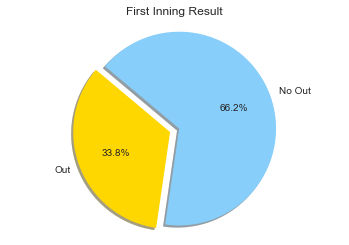

In [150]:
labels = 'Out', 'No Out'
sizes = [28450, 55699,]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0) 
plt.title ('First Inning Result')
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

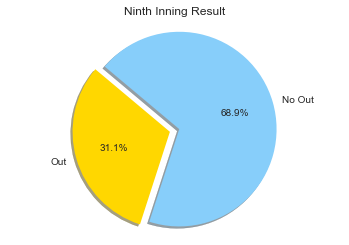

In [151]:
labels = 'Out', 'No Out'
sizes = [19433, 42983,]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0) 
plt.title ('Ninth Inning Result')
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

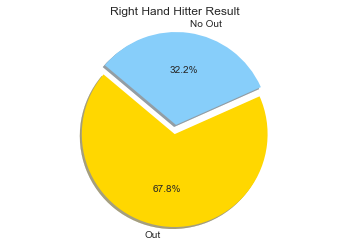

In [155]:
labels = 'Out', 'No Out'
sizes = [293766, 139664,]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0) 
plt.title ('Right Hand Hitter Result')
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

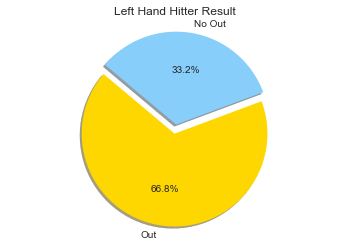

In [157]:
labels = 'Out', 'No Out'
sizes = [205392 , 102142,]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0) 
plt.title ('Left Hand Hitter Result')
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

These pie charts visualize the On Base % means that I found earlier with the data